In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = KNeighborsRegressor()

# 2. Setup Pipeline

In [4]:
pca=PCA()
RG = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [6]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "RG__n_neighbors":[1,4,5,6,7,8,10]
    
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'RG__n_neighbors': [1, 4, 5, 6, 7, 8, 10],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.792):
{'RG__n_neighbors': 6, 'pca__n_components': 10}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__n_neighbors,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.229309,0.032243,0.050010,0.042665,6,10,"{'RG__n_neighbors': 6, 'pca__n_components': 10}",-0.743143,-0.729523,-0.901279,-0.920430,-0.945664,-0.803394,-0.700961,-0.630891,-0.802756,-0.737202,-0.791524,0.097893,1
9,0.248734,0.052214,0.051563,0.037090,4,10,"{'RG__n_neighbors': 4, 'pca__n_components': 10}",-0.755080,-0.742585,-0.932567,-0.859052,-1.034314,-0.809154,-0.681577,-0.611271,-0.804694,-0.695969,-0.792626,0.118872,2
17,0.179689,0.044496,0.034684,0.033054,5,10,"{'RG__n_neighbors': 5, 'pca__n_components': 10}",-0.728662,-0.741395,-0.908086,-0.919711,-0.976449,-0.848174,-0.677815,-0.621035,-0.793621,-0.753906,-0.796885,0.108175,3
33,0.177239,0.072200,0.065178,0.044874,7,10,"{'RG__n_neighbors': 7, 'pca__n_components': 10}",-0.757353,-0.742998,-0.931464,-0.923024,-0.973643,-0.796219,-0.718747,-0.641885,-0.857012,-0.767234,-0.810958,0.101182,4
40,0.147298,0.065317,0.055628,0.046271,8,5,"{'RG__n_neighbors': 8, 'pca__n_components': 5}",-0.799914,-0.763421,-0.925867,-0.886056,-0.967084,-0.807958,-0.738807,-0.674780,-0.825267,-0.778886,-0.816804,0.083816,5
41,0.156605,0.033410,0.067047,0.043582,8,10,"{'RG__n_neighbors': 8, 'pca__n_components': 10}",-0.774295,-0.758106,-0.918499,-0.925962,-0.975162,-0.823511,-0.753689,-0.660798,-0.847629,-0.754587,-0.819224,0.092583,6
18,0.239544,0.062923,0.112807,0.041356,5,30,"{'RG__n_neighbors': 5, 'pca__n_components': 30}",-0.771480,-0.760205,-0.953241,-0.869746,-0.990839,-0.812833,-0.711918,-0.708582,-0.908025,-0.741121,-0.822799,0.096634,7
16,0.120817,0.055216,0.015496,0.021737,5,5,"{'RG__n_neighbors': 5, 'pca__n_components': 5}",-0.800353,-0.748220,-0.916514,-0.949859,-1.000051,-0.800248,-0.704622,-0.665828,-0.885579,-0.757383,-0.822866,0.104760,8
32,0.161365,0.052396,0.052426,0.049513,7,5,"{'RG__n_neighbors': 7, 'pca__n_components': 5}",-0.813358,-0.770378,-0.975861,-0.922482,-0.982985,-0.810822,-0.742268,-0.627987,-0.842038,-0.751272,-0.823945,0.105790,9
24,0.186159,0.057537,0.061705,0.052279,6,5,"{'RG__n_neighbors': 6, 'pca__n_components': 5}",-0.793372,-0.778318,-0.975763,-0.974929,-1.003041,-0.765136,-0.742294,-0.639449,-0.846515,-0.773281,-0.829210,0.113093,10


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__n_neighbors': 6, 'pca__n_components': 10}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_n = parms.iloc[0][0]['RG__n_neighbors']

In [13]:
Model_2 = KNeighborsRegressor(n_neighbors=best_n)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

KNeighborsRegressor(n_neighbors=6)

In [16]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(RG1.predict(PX_test1),Y_test1)

1.886715485230186

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

1071.965842723833

# 5.1 Model using original sales data

In [21]:
Model_3 = KNeighborsRegressor(n_neighbors=best_n)

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

KNeighborsRegressor(n_neighbors=6)

In [25]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(RG2.predict(PX_test2),Y_test2)

1110.4397048236142

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

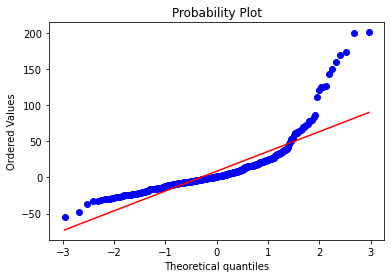

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

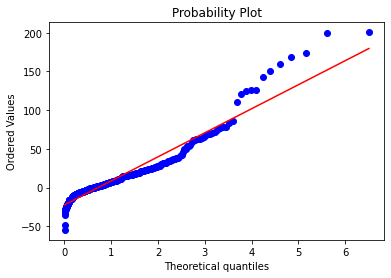

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

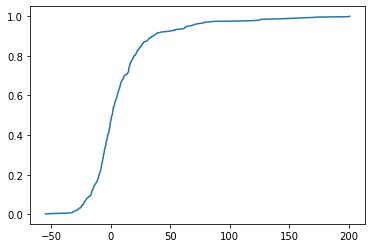

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

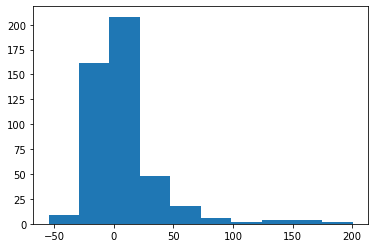

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

8.804301411042525

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

26148.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

23128.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

26844.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4=KNeighborsRegressor(n_neighbors=best_n)

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.275082,0.328708,0.243477,0.241373,0.233441,0.346855,0.312286,0.275108,0.301807,0.277468,0.283561
Exponential,0.247632,0.271168,0.187489,0.220086,0.196535,0.329133,0.284186,0.198786,0.227004,0.271514,0.243353
Empirical,0.288227,0.330476,0.250475,0.254936,0.243191,0.366933,0.322905,0.275802,0.303418,0.299462,0.293582


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,11384.0,14876.0,11272.0,11248.0,11588.0,13544.0,15292.0,12688.0,13492.0,11556.0,12694.0,1456.621021
Exponential,10248.0,12272.0,8680.0,10256.0,9756.0,12852.0,13916.0,9168.0,10148.0,11308.0,10860.4,1599.438351
Empirical,11928.0,14956.0,11596.0,11880.0,12072.0,14328.0,15812.0,12720.0,13564.0,12472.0,13132.8,1386.786559
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\3.1A_KNN.csv")